# Data Exploration

In this notebook, we will be diving a little deeper into the exploration of our drug survey respondent dataset and visualize some of the underlying patterns/trends/correlations. 

Lets start of by importing the necessary packages as well as our dataset which we will be using throughout the notebook:

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Loading the Data

In [124]:
df = pd.read_csv("../data/respondent_data_clean.csv", index_col=0)
df.head()

age  gender                         education residing_country  \
0  35-44  Female  Professional Certificate/Diploma               UK   
1  25-34    Male                  Doctorate Degree               UK   
2  35-44    Male  Professional Certificate/Diploma               UK   
3  18-24  Female                    Masters Degree               UK   
4  35-44  Female                  Doctorate Degree               UK   

                     race  n_score  e_score  o_score  a_score  c_score  ...  \
0  Biracial - White/Asian     39.0     36.0     42.0     37.0     42.0  ...   
1                   White     29.0     52.0     55.0     48.0     41.0  ...   
2                   White     31.0     45.0     40.0     32.0     34.0  ...   
3                   White     34.0     34.0     46.0     47.0     46.0  ...   
4                   White     43.0     28.0     43.0     41.0     50.0  ...   

   crack  ecstasy heroin ketamine legalh  lsd meth mushrooms nicotine  vsa  
0    CL0      CL0    CL0      CL0    CL0  CL0  CL0       CL0      CL2  CL0  
1    CL0      CL4    CL0      CL2    CL0  CL2  CL3       CL0      CL4  CL0  
2    CL0      CL0    CL0      CL0    CL0  CL0  CL0       CL1      CL0  CL0  
3    CL0      CL0    CL0      CL2    CL0  CL0  CL0       CL0      CL2  CL0  
4    CL0      CL1    CL0      CL0    CL1  CL0  CL0       CL2      CL2  CL0  

[5 rows x 30 columns]

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1877 non-null   object 
 1   gender            1877 non-null   object 
 2   education         1877 non-null   object 
 3   residing_country  1877 non-null   object 
 4   race              1877 non-null   object 
 5   n_score           1877 non-null   float64
 6   e_score           1877 non-null   float64
 7   o_score           1877 non-null   float64
 8   a_score           1877 non-null   float64
 9   c_score           1877 non-null   float64
 10  i_score           1877 non-null   float64
 11  s_score           1877 non-null   float64
 12  alcohol           1877 non-null   object 
 13  amphet            1877 non-null   object 
 14  amyl              1877 non-null   object 
 15  benzos            1877 non-null   object 
 16  caffeine          1877 non-null   object 


## Exploring the Personality Variables

The first step in this exploration will be to further explore the numerical variables, i.e., the variables representing the different aspects of personality. Lets first separate this data from the table, and then we can look at some scatterplots to discern the various correlations between these variables.

Again, lets just make note of what each score represents:

**n_score** - represents neuroticism (which is one's disposition to experience negative emotions such as anger or anxiety) 

**e_score** - represents extraversion (which represents how outgoing or social an individual is)

**o_score** - represents one's openness to experience or trying new things

**a_score** - represents agreeableness or one's ability to put others' needs over their own (can be associated with altruistic or empathetic behavior)

**c_score** - represents conscientiousness or the tendency to adhere to norms/rules and do what is right. 

**i_score** - represents impulsivity or tendency to act without thinking/on impulse. This is quite related to 

**s-score** - represents sensation-seeking or one's tendency to search for experiences and feelings.



In [126]:
df.columns

Index(['age', 'gender', 'education', 'residing_country', 'race', 'n_score',
       'e_score', 'o_score', 'a_score', 'c_score', 'i_score', 's_score',
       'alcohol', 'amphet', 'amyl', 'benzos', 'caffeine', 'cannabis',
       'chocolate', 'cocaine', 'crack', 'ecstasy', 'heroin', 'ketamine',
       'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'vsa'],
      dtype='object')

In [127]:
#Separating the numerical data
numerical_data = df[['n_score','e_score','o_score','a_score','c_score','i_score','s_score']]
numerical_data.head()

n_score  e_score  o_score  a_score  c_score  i_score  s_score
0     39.0     36.0     42.0     37.0     42.0      4.0      3.0
1     29.0     52.0     55.0     48.0     41.0      3.0      6.0
2     31.0     45.0     40.0     32.0     34.0      2.0      8.0
3     34.0     34.0     46.0     47.0     46.0      2.0      3.0
4     43.0     28.0     43.0     41.0     50.0      4.0      6.0

Text(0.5, 1.0, 'Pairplots of Personality Variables')

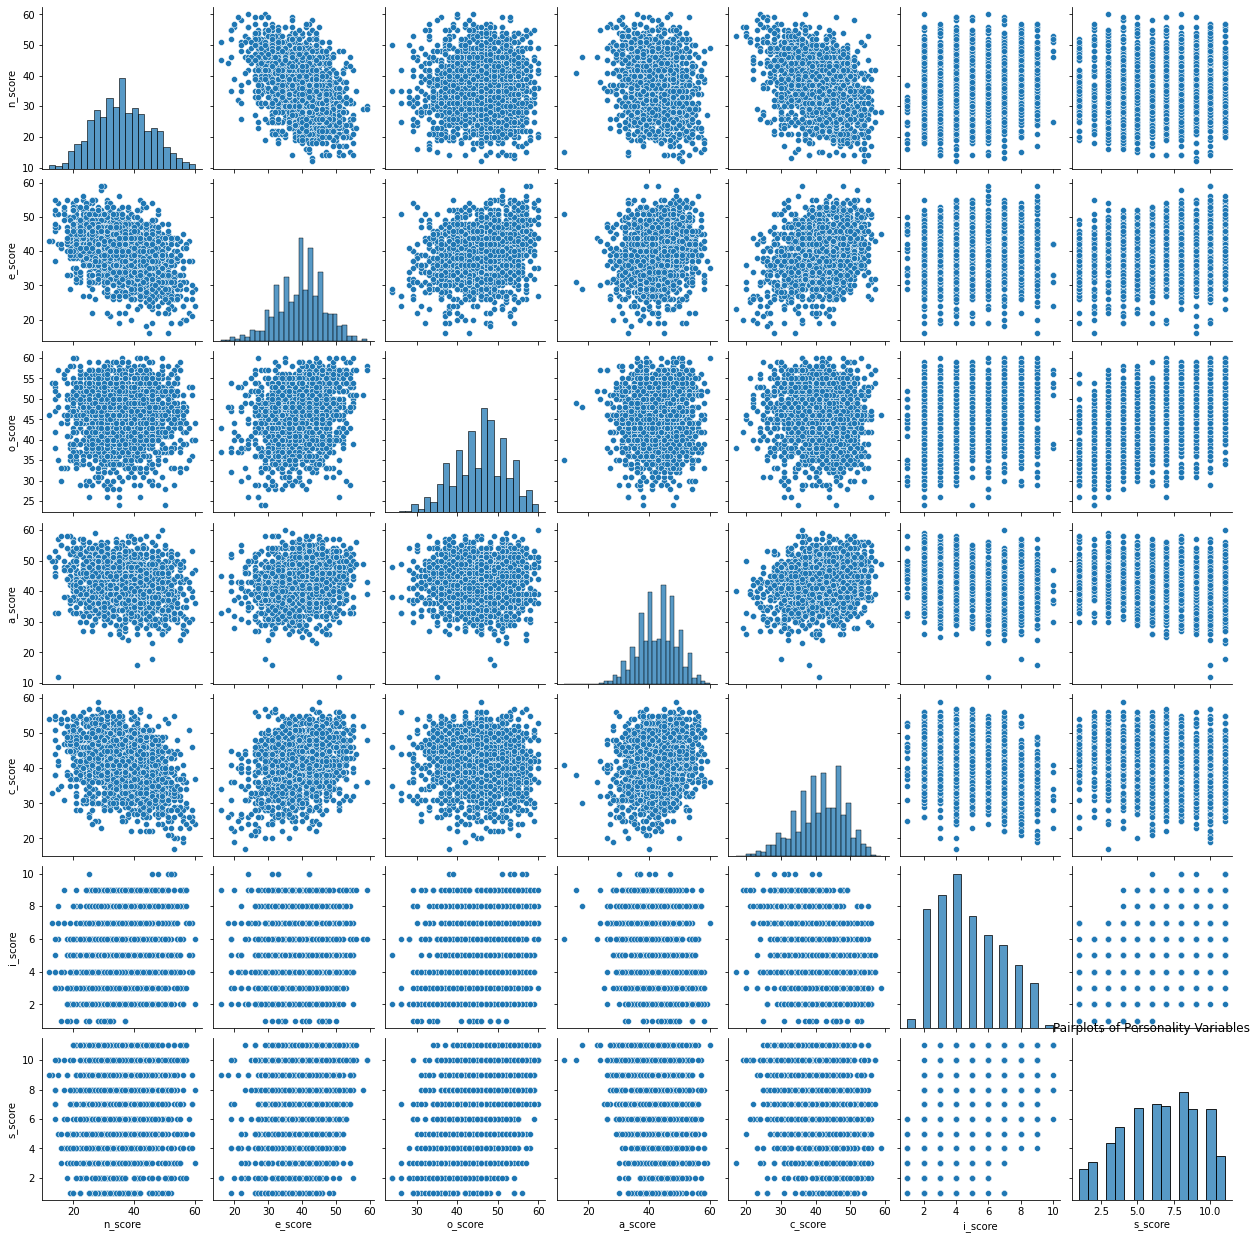

In [128]:
#Lets create pairplots of these variables using the seaborn package

sns.pairplot(numerical_data)
plt.title('Pairplots of Personality Variables')

<AxesSubplot:>

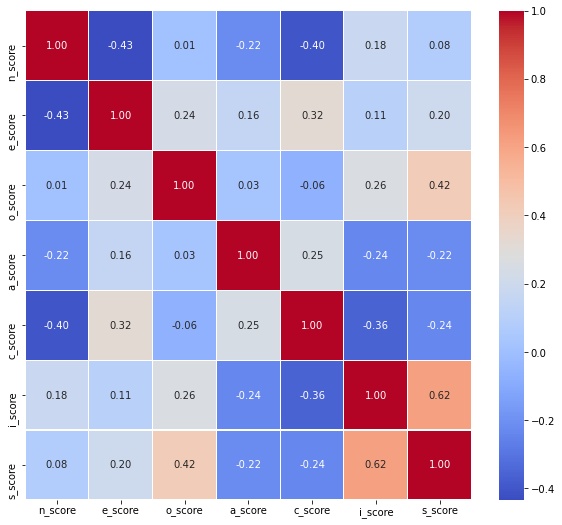

In [129]:
# Let's also make a heatmap of the data 
plt.figure(figsize=(10,9))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=.05)

We can see that there are not very many strong linear relationships between our numerical variables that are worth noting. The strongest relation is between the i_score and the s_score, but this can just be due to the fact that there simply are not as many options for observation values for these two scores as there are for the other variables. 

### Summary Statistics of Numerical Data

Let's look as at some of the basic summary statistics of these variables, as well as how these summary statistics change when we group them by some of the respondent description variables (age, gender, education).

In [130]:
numerical_data.describe()

n_score      e_score      o_score      a_score      c_score  \
count  1877.000000  1877.000000  1877.000000  1877.000000  1877.000000   
mean     35.917421    39.564198    45.744806    42.864145    41.436335   
std       9.137606     6.772165     6.577274     6.433950     6.967241   
min      12.000000    16.000000    24.000000    12.000000    17.000000   
25%      29.000000    35.000000    41.000000    39.000000    37.000000   
50%      36.000000    40.000000    46.000000    43.000000    42.000000   
75%      42.000000    44.000000    51.000000    48.000000    46.000000   
max      60.000000    59.000000    60.000000    60.000000    59.000000   

           i_score      s_score  
count  1877.000000  1877.000000  
mean      4.795418     6.550346  
std       2.119993     2.694511  
min       1.000000     1.000000  
25%       3.000000     5.000000  
50%       4.000000     7.000000  
75%       6.000000     9.000000  
max      10.000000    11.000000

#### Numerical Data Grouped by Gender

In [131]:
#Means for each personality score, grouped by gender
df.groupby('gender').mean()

n_score    e_score    o_score    a_score    c_score   i_score  \
gender                                                                    
Female  36.545358  39.983991  44.831377  44.280683  42.708645  4.441836   
Male    35.291489  39.145745  46.655319  41.452128  40.168085  5.147872   

         s_score  
gender            
Female  5.862327  
Male    7.236170

##### Personality Trait Boxplots for each Gender

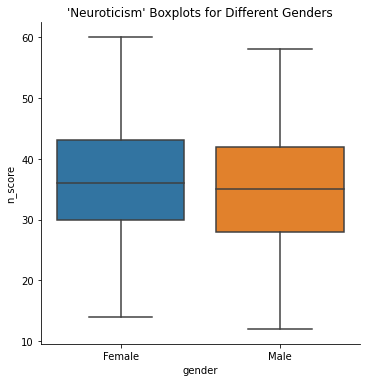

In [132]:
sns.catplot(x='gender',y='n_score',data=df, kind='box')
plt.title("'Neuroticism' Boxplots for Different Genders")
plt.show()

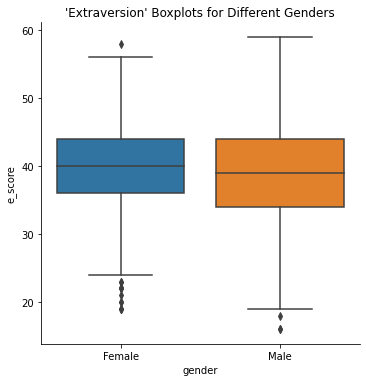

In [133]:
sns.catplot(x='gender',y='e_score',data=df, kind='box')
plt.title("'Extraversion' Boxplots for Different Genders")
plt.show()

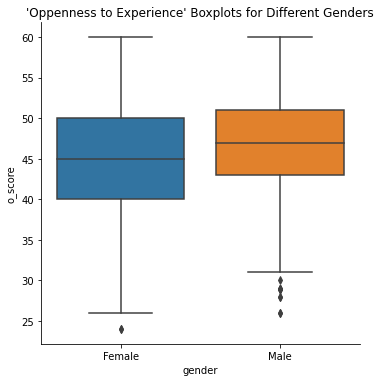

In [134]:
sns.catplot(x='gender',y='o_score',data=df, kind='box')
plt.title("'Oppenness to Experience' Boxplots for Different Genders")
plt.show()

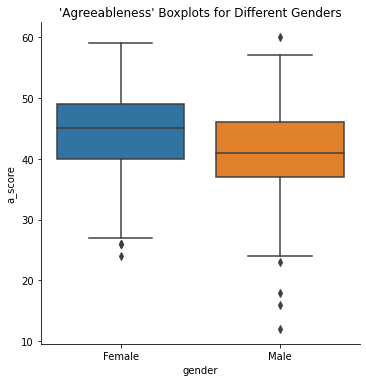

In [135]:
sns.catplot(x='gender',y='a_score',data=df, kind='box')
plt.title("'Agreeableness' Boxplots for Different Genders")
plt.show()

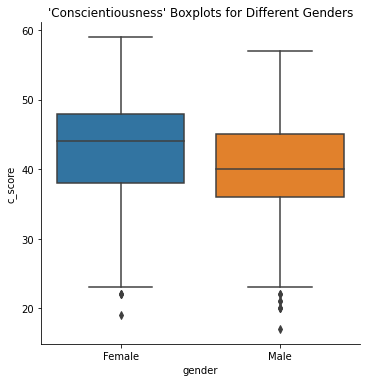

In [136]:
sns.catplot(x='gender',y='c_score',data=df, kind='box')
plt.title("'Conscientiousness' Boxplots for Different Genders")
plt.show()

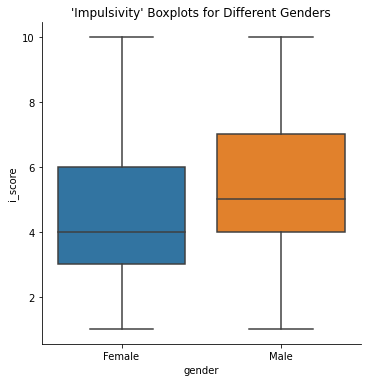

In [137]:
sns.catplot(x='gender',y='i_score',data=df, kind='box')
plt.title("'Impulsivity' Boxplots for Different Genders")
plt.show()

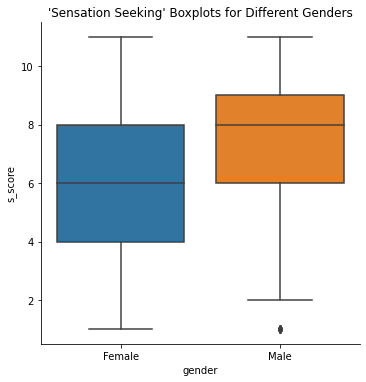

In [138]:
sns.catplot(x='gender',y='s_score',data=df, kind='box')
plt.title("'Sensation Seeking' Boxplots for Different Genders")
plt.show()

##### Permuation Test for Difference in Means of S-Score between Genders

The difference in mean for s-score between male and female is 1.373843. It would be interesting to see if this difference we see in s-score is statistically significant. Let's do a permuation test to figure out if the observed mean difference would occur if we shuffled the values!

Let's assume that gender doesn’t have an impact on our sensation seeking variable (i.e. both genders have the same tendency to search for new experiences and feelings). This will be our null hypothesis, and our alternate hypothesis will be there actually is a statistically significant difference in s-score based on gender. With the null assumption, we should get a difference in mean s-score between male and female that's pretty similar to the one we actually got (1.373843) by: 

a. shuffling the s-score column 
b. keeping the gender column the same 
c. calculating the difference between the mean s-scores for male and female

We will perform this shuffle/permutation several times, each time calculating the mean s-scores for male and female and the difference between these means. We then take the mean of all these differences which will be great indicator of what the difference would be if our initial assumption were true and gender really doesn’t impact s-score. If the observed difference looks just like the permutation difference, then we stick with the claim that gender doesn’t impact s-score. If instead the permutation difference differs significantly from the observed difference, we'll conclude that gender actually does have an impact on s-score.

In [139]:
#Let's split the s-score for each gender to find their distributions
male = df['s_score'][df['gender'] == 'Male']
female = df['s_score'][df['gender'] == 'Female']

In [140]:
male_normal = stats.normaltest(male)
male_normal

NormaltestResult(statistic=55.9985619919994, pvalue=6.919373375962682e-13)

In [141]:
female_normal = stats.normaltest(female)
female_normal

NormaltestResult(statistic=116.83225861230989, pvalue=4.2677344458358485e-26)

Since the p_value is very close to zero, we see that these s-scores are not normally distributed, so we will use a non-parametric test. 

In [142]:
# Lets create a column called `Permutation1` and assign to it the result of permuting (shuffling) the s-score column
np.random.seed(42)
df_perm = df.copy(deep=True)
df_perm['Permutation1'] = np.random.permutation(df_perm['s_score'])

df_perm.groupby('gender')['Permutation1'].describe()

count      mean       std  min  25%  50%  75%   max
gender                                                     
Female  937.0  6.525080  2.747505  1.0  4.0  7.0  9.0  11.0
Male    940.0  6.575532  2.641852  1.0  5.0  7.0  9.0  11.0

Here, with just one permutation, we see the difference in means of s-score for different genders is just 0.050452, which is very different from our observed value of 1.373843.

Let's do this permuation 10,000 times and take the mean of all the differences from each permutation. 

In [143]:
#First, we initialize an empty list of differences
difference = []

# Now, we make a for loop that makes a permutation of s-score and calculates the difference in means 
# for male and female 10,000 times:
df_perm = df.copy(deep=True)
for i in range(10000):
    permutation = np.random.permutation(df_perm['s_score'])
    difference.append(np.mean(permutation[df_perm['gender']=='Male']) - np.mean(permutation[df_perm['gender']=='Female']))

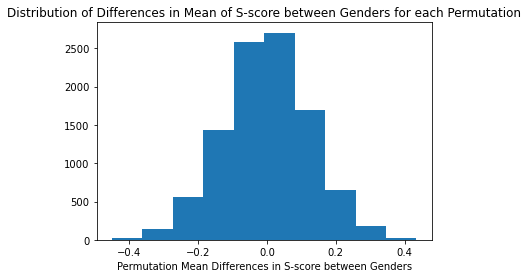

In [144]:
plt.hist(difference)
plt.xlabel('Permutation Mean Differences in S-score between Genders')
plt.title('Distribution of Differences in Mean of S-score between Genders for each Permutation')
plt.show()

In [145]:
#Let's assign the observed mean difference to a variable to perform a significance test. 
obs_difference = abs(np.mean(male) - np.mean(female))
obs_difference

1.3738436385930655

The p-value of our observed data represents the proportion of the data given the null that's at least as extreme as our observed data. We're going to count how many of the differences in our difference list are at least as extreme as our observed difference.

If less than or equal to 5% of them are, then we will reject the Null hypothesis.

In [146]:
from scipy.stats import norm

(1 - norm.cdf(obs_difference, np.mean(difference), np.std(difference)))*2

0.0

The p-value is zero! So we reject our null hypothesis and conclude that there actually is a significant difference in the s-score means between males and females. This is very interesting to note!

Although this permutation test was fun to do, it was a bit time consuming, so we will use a standard frequentist t-test for our statistical tests going forward. 

##### Further Statistical Significance Testing for differences in Personality between Genders

Let's now look at the statistical significance of the difference in means between gender groups for some of the other personality scores. We will start with i-score (impulsivity). Our null hypothesis for each of these tests will be that there is no statistically significant difference. We will use the standard significance level of alpha = 0.05 to evaluate our p-scores. 

In [147]:
#Split data by gender
male = df[df['gender'] == 'Male']
female = df[df['gender'] == 'Female']

In [148]:
from scipy.stats import ttest_ind
ttest_ind(male.i_score, female.i_score, equal_var = True)

Ttest_indResult(statistic=7.314558192280121, pvalue=3.808344489483829e-13)

We see a p-value well below 0.05, so we reject the null hypothesis that there is no difference in impulsivity between males and females. Let's now try a-score (agreeableness).

In [149]:
ttest_ind(male.a_score, female.a_score, equal_var = True)

Ttest_indResult(statistic=-9.759618861007507, pvalue=5.542108007972508e-22)

We again reject the null hypothesis that there is no difference in agreeableness between males and females. Let's now try c-score (conscientiousness).

In [150]:
ttest_ind(male.c_score, female.c_score, equal_var = True)

Ttest_indResult(statistic=-8.031547204130606, pvalue=1.6836718694483834e-15)

Once again, we can reject the null hypothesis that there is no difference in conscientiousness between males and females. These tests are quite informative in looking at the behaviors of our samples. 

Let's move on to exploring differences in our personality scores with different age groups. 

#### Numerical Data Grouped by Age

We should first note from our data wrangling notebook that there are far fewer observations from those aged 65+ than there are from those aged 18-24. Shown below, 637 (or about 34%) of the respondents are 18-24, while only about 18 (or about 1%) are 65+. Since this sample size of those 65+ is so small, it makes sense for us to combine the 55-64 and 65+ age groups to just be 55+.

In [151]:
df['age'].value_counts()

18-24    637
25-34    480
35-44    355
45-54    294
55-64     93
65+       18
Name: age, dtype: int64

In [152]:
df['age'] = df['age'].replace(['55-64','65+'],['55+','55+'])
df['age'].value_counts()

18-24    637
25-34    480
35-44    355
45-54    294
55+      111
Name: age, dtype: int64

In [153]:
df.groupby('age').mean()

n_score    e_score    o_score    a_score    c_score   i_score  \
age                                                                      
18-24  37.059655  39.623234  47.836735  42.254317  39.477237  5.368917   
25-34  36.529167  39.939583  45.520833  43.037500  41.960417  4.729167   
35-44  35.780282  39.008451  44.000000  42.746479  42.425352  4.402817   
45-54  33.965986  39.765306  44.316327  44.149660  43.057823  4.255102   
55+    32.324324  38.846847  44.072072  42.585586  42.954955  4.477477   

        s_score  
age              
18-24  7.701727  
25-34  6.577083  
35-44  5.732394  
45-54  5.517007  
55+    5.180180

It is interesting to note that the means for neuroticism, oppenness to experience, impulsivity, and sensation seeking go down as age increases, and the means for conscientiousness increase as one gets older. Although we do not know whether these differences are statistically significant without doing some further hypothesis testing, etc., we can still see that these observations make some sense in the fact that younger people are generally more likely to be more impulsive/neurotic and open to new experiences and sensations, while older people are more likely to adhere to norms. 

Now, let's visualize the summary statistics for these variables for each age group using boxplots: 

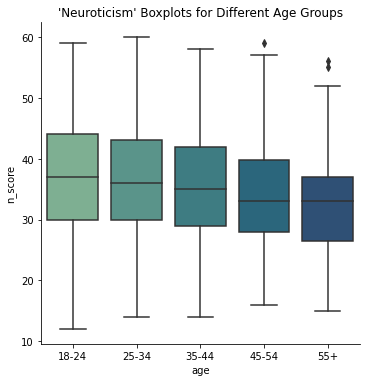

In [154]:
sns.catplot(x='age',y='n_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Neuroticism' Boxplots for Different Age Groups")
plt.show()

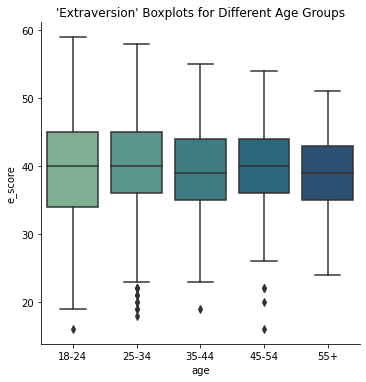

In [155]:
sns.catplot(x='age',y='e_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Extraversion' Boxplots for Different Age Groups")
plt.show()

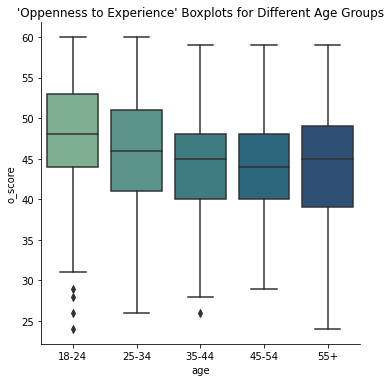

In [156]:
sns.catplot(x='age',y='o_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Oppenness to Experience' Boxplots for Different Age Groups")
plt.show()

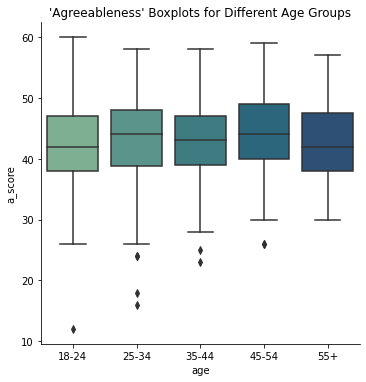

In [157]:
sns.catplot(x='age',y='a_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Agreeableness' Boxplots for Different Age Groups")
plt.show()

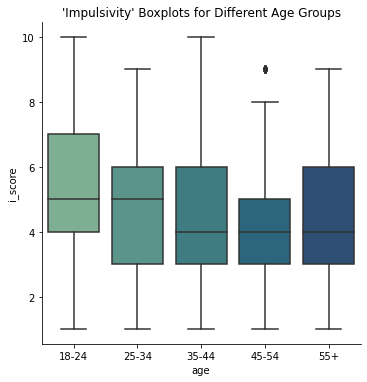

In [158]:
sns.catplot(x='age',y='i_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Impulsivity' Boxplots for Different Age Groups")
plt.show()

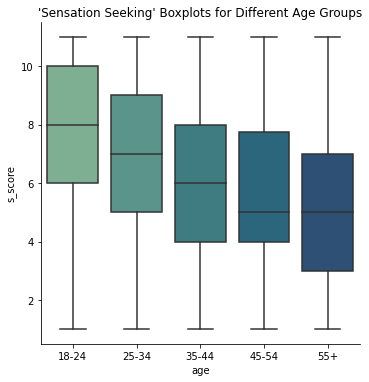

In [159]:
sns.catplot(x='age',y='s_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Sensation Seeking' Boxplots for Different Age Groups")
plt.show()

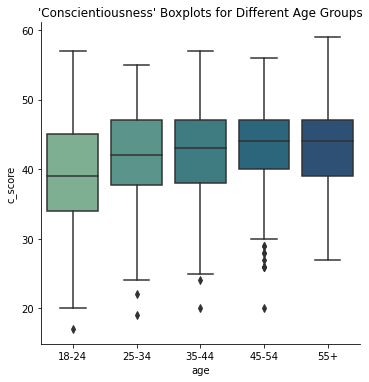

In [160]:
sns.catplot(x='age',y='c_score',data=df, kind='box',order=['18-24','25-34','35-44','45-54','55+'], palette='crest')
plt.title("'Conscientiousness' Boxplots for Different Age Groups")
plt.show()

##### Statistical Testing for Difference in Means of Personality Features for different Age Groups

It seems the s-score seems to have the most steady decline in median values as age increases and most significant difference in values in regards to max and min means. Let's do a t-test to figure out if the difference in means for the personality variables between age 18-24 and age 55+ are significant or not. Our null hypothesis will be that there is no significant difference for each score between the two age groups. Let's start with s-score.

In [161]:
young = df[df.age == '18-24']
old = df[df.age == '55+']

In [162]:
ttest_ind(young.s_score, old.s_score, equal_var = True)

Ttest_indResult(statistic=10.450135655438933, pvalue=5.994893594184389e-24)

We got a value of 5.99e-24, which is basically zero! So at an alpha level of 0.05, we reject our null hypothesis and conclude there is something else going on that is causing us to observe older people to be less likely to look for new sensations than younger people (though this does make perfect sense as older people are generally more content with life and are not looking for new experiences as much as younger people)! Let's do the same for n_score, which we also observed to have quite a difference between the two age groups. 

In [163]:
ttest_ind(young.n_score, old.n_score, equal_var = True)

Ttest_indResult(statistic=4.950771932246505, pvalue=9.146076223924197e-07)

Again, we got a p-value very close to zero, so we reject the null hypothesis that the n scores are the same between the two groups and conclude something else is causing a difference in neuroticism in our sample. Let's try o-score, i-score, and c-score. 

In [164]:
ttest_ind(young.o_score, old.o_score, equal_var = True)

Ttest_indResult(statistic=5.793868581041436, pvalue=1.0143078852658828e-08)

In [165]:
ttest_ind(young.i_score, old.i_score, equal_var = True)

Ttest_indResult(statistic=4.13211532822557, pvalue=4.0016208863453847e-05)

In [166]:
ttest_ind(young.c_score, old.c_score, equal_var = True)

Ttest_indResult(statistic=-4.6634050762064785, pvalue=3.685070587258224e-06)

We reject the null hypothesis for each of these and find that there are no statistical differences in these personality traits between age groups in our sample. 

Let's now move onto the different education groupings. 

#### Numerical Data Grouped by Education

We should again note from our data wrangling notebook that there are very little observations for those who left school before 16, at 16, at 17, at 18, as well as those with doctorate degrees (shown below). Let's again combine some of these categories since the samples are so small for some. Particularly, lets make a new category called "Left School Before College" which combines Left School before 16, at 16, at 17, at 18, as well as make a new category called "Graduate Degree" which combines "Masters Degree" and "Doctorate Degree".

In [167]:
df['education'].value_counts()

Attending College/No Certificate or Degree    503
University Degree                             478
Masters Degree                                283
Professional Certificate/Diploma              270
Left School at 18                              99
Left School at 16                              98
Doctorate Degree                               89
Left School at 17                              29
Left School before 16                          28
Name: education, dtype: int64

In [168]:
df['education'] = df['education'].replace(['Left School before 16','Left School at 16', 'Left School at 17', 'Left School at 18', 'Masters Degree', 'Doctorate Degree'],
                                          ['Left School before College','Left School before College', 'Left School before College', 'Left School before College', 'Graduate Degree', 'Graduate Degree'])
df['education'].value_counts()

Attending College/No Certificate or Degree    503
University Degree                             478
Graduate Degree                               372
Professional Certificate/Diploma              270
Left School before College                    254
Name: education, dtype: int64

In [169]:
df.groupby('education').mean()

n_score    e_score    o_score  \
education                                                                     
Attending College/No Certificate or Degree  37.123260  39.041750  47.791252   
Graduate Degree                             34.067204  40.986559  46.244624   
Left School before College                  36.696850  38.255906  43.334646   
Professional Certificate/Diploma            35.770370  39.329630  43.800000   
University Degree                           35.757322  39.834728  45.581590   

                                              a_score    c_score   i_score  \
education                                                                    
Attending College/No Certificate or Degree  42.071571  38.658052  5.443340   
Graduate Degree                             43.956989  44.209677  4.236559   
Left School before College                  42.255906  40.070866  4.791339   
Professional Certificate/Diploma            43.129630  42.096296  4.770370   
University Degree                           43.020921  42.554393  4.564854   

                                             s_score  
education                                             
Attending College/No Certificate or Degree  7.624254  
Graduate Degree                             5.889785  
Left School before College                  6.437008  
Professional Certificate/Diploma            6.018519  
University Degree                           6.294979

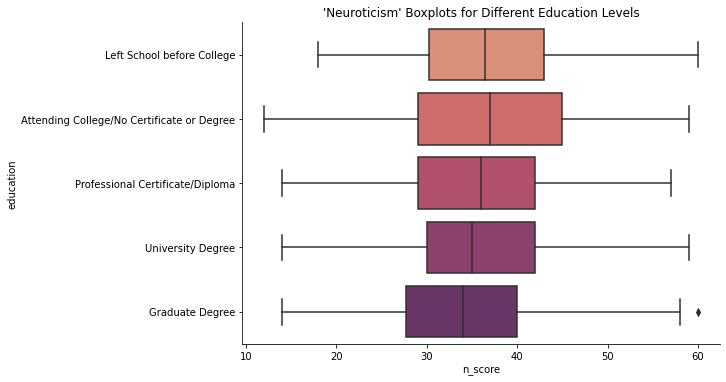

In [170]:
sns.catplot(x='n_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Neuroticism' Boxplots for Different Education Levels")

plt.show()

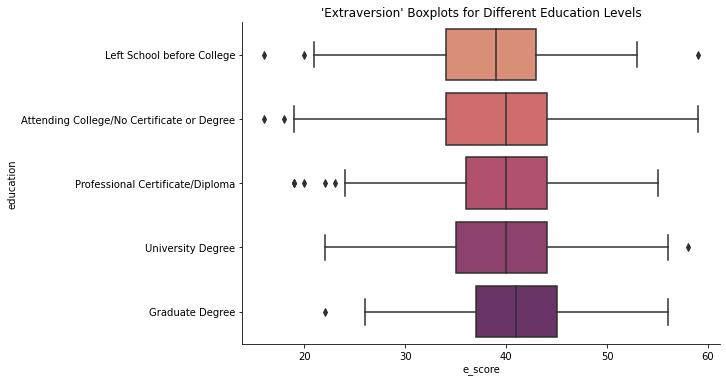

In [171]:
sns.catplot(x='e_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Extraversion' Boxplots for Different Education Levels")

plt.show()

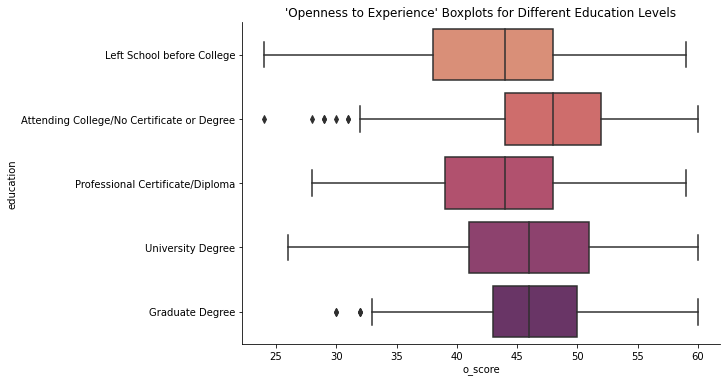

In [172]:
sns.catplot(x='o_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Openness to Experience' Boxplots for Different Education Levels")

plt.show()

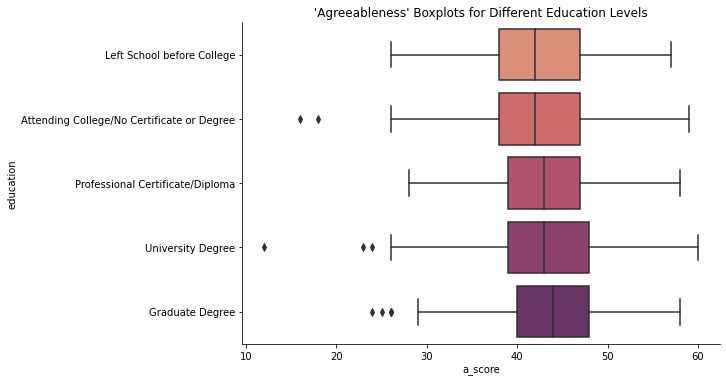

In [173]:
sns.catplot(x='a_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Agreeableness' Boxplots for Different Education Levels")

plt.show()

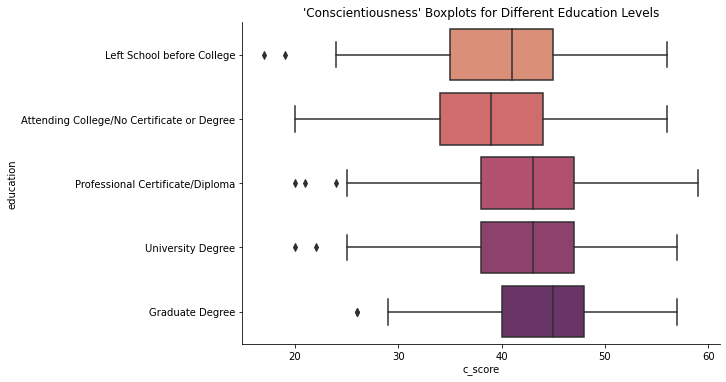

In [174]:
sns.catplot(x='c_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Conscientiousness' Boxplots for Different Education Levels")

plt.show()

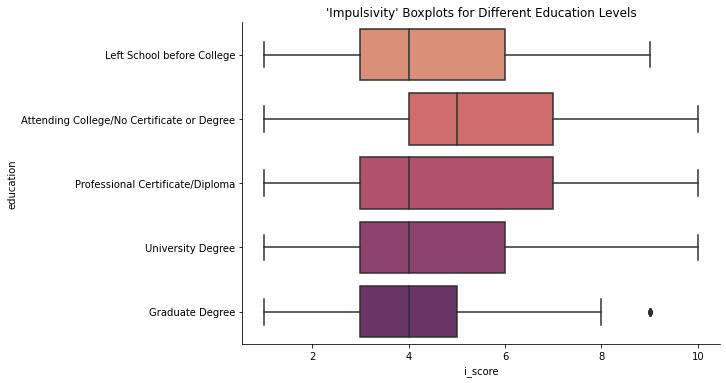

In [175]:
sns.catplot(x='i_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Impulsivity' Boxplots for Different Education Levels")

plt.show()

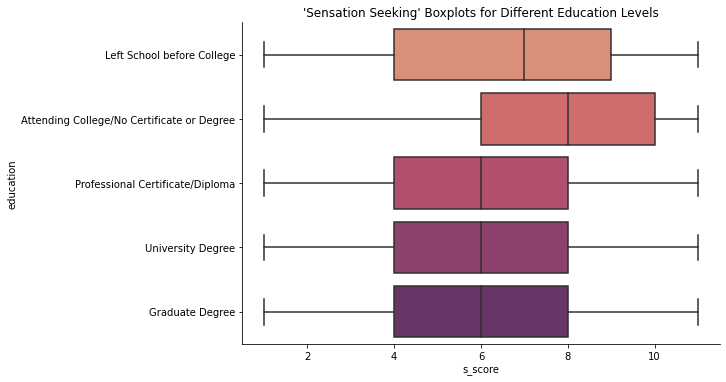

In [176]:
sns.catplot(x='s_score',y='education',data=df, kind='box',order=['Left School before College','Attending College/No Certificate or Degree','Professional Certificate/Diploma','University Degree', 'Graduate Degree'],
           aspect = 2, palette='flare')
plt.title("'Sensation Seeking' Boxplots for Different Education Levels")

plt.show()

It is interesting to note that conscientiousness tends to go up with education level, which makes sense in that people are more likely to adhere to societal norms as they increase their formal education and join the work force. It is also interesting to note that those currently attending college have much higher values for sensation seeking and openess to experience, which again makes sense as those in undergraduate are exploring themselves and are very open to trying new things. 

##### Statistical Testing for Difference in Means of Personality Features for different Age Groups

Let's again do some statistical t-tests to understand the significance of these findings. We can start with the difference in means of o-score between those currently attending college and those who left school before college.

In [177]:
attending_college = df[df.education == 'Attending College/No Certificate or Degree']
left_before = df[df.education == 'Left School before College']

ttest_ind(attending_college.o_score, left_before.o_score, equal_var = True)

Ttest_indResult(statistic=8.769385530963051, pvalue=1.1806881766694308e-17)

We get a p-value of about zero! So we reject the null hypothesis and conclude there is a statistically significant difference in the oppeness to experience between those currently attending college and those who left school before college. Now, we will look at whether there is a signifcant difference in impulsivity between those who left school before college and those attending college. 

In [178]:
ttest_ind(attending_college.i_score, left_before.i_score, equal_var = True)

Ttest_indResult(statistic=3.880071475858795, pvalue=0.00011354535463515853)

We see with an alpha level of 0.05 that we can again reject the null hypothesis and conclude that the higher impulsivity we see in those attending college is significant. Let's also look at the difference in agreeableness and conscientiousness between those who left school before college and those who have a graduate degree. 

In [179]:
grad_degree = df[df.education == 'Graduate Degree']
ttest_ind(grad_degree.a_score, left_before.a_score, equal_var = True)

Ttest_indResult(statistic=3.3631758320730367, pvalue=0.0008176671394775663)

In [180]:
ttest_ind(grad_degree.c_score, left_before.c_score, equal_var = True)

Ttest_indResult(statistic=7.894356421218508, pvalue=1.3168509723270948e-14)

We reject the null hypothesis for both and find there may be a statistical difference in agreeableness and coscientiousness between those who left school before attending college and those who have obtained a graduate degree. 

Lets now begin looking at some of our drug consumption categories.

## Exploring the Drug Consumption Variables

We should now begin to explore some of our drug consumption variables, particulary those that we are interested in predicting (alcohol, cocaine, benzodiazepines). Remember, for all drug attributes, the values range from CL0-CL6, where:
    
    CL0 = Never Used 
    CL1 = Used over a Decade Ago 
    CL2 = Used in Last Decade
    CL3 = Used in Last Year 
    CL4 = Used in Last Month 
    CL5 = Used in Last Week 
    CL6 = Used in Last Day 

Let's first look at basic distributions of these variables. 

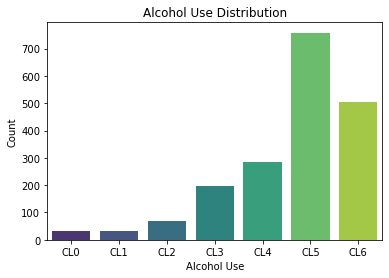

In [181]:
order=['CL0','CL1','CL2','CL3','CL4','CL5','CL6']
sns.countplot(x='alcohol', data=df, order=order, palette='viridis')
plt.xlabel('Alcohol Use')
plt.ylabel('Count')
plt.title('Alcohol Use Distribution')
plt.show()

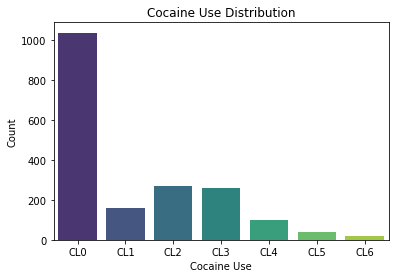

In [182]:
sns.countplot(x='cocaine', data=df, order=order, palette='viridis')
plt.xlabel('Cocaine Use')
plt.ylabel('Count')
plt.title('Cocaine Use Distribution')
plt.show()

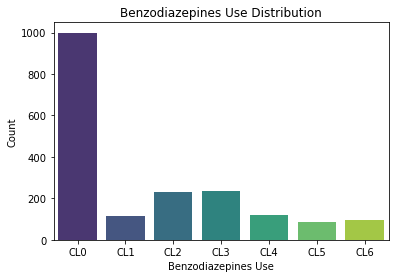

In [183]:
sns.countplot(x='benzos', data=df, order=order, palette='viridis')
plt.xlabel('Benzodiazepines Use')
plt.ylabel('Count')
plt.title('Benzodiazepines Use Distribution')
plt.show()

We can see that the majority of respondents are somewhat regular alcohol users, while the majority of respondents have never used cocaine or benzos.It is important to note that alcohol is a legal, recreational substance so it is not very hard to believe the distribution above. Cocaine is an illegal substance, while Benzos are prescription drugs (used to treat anxiety, insomnia, and seizures) that can be obtained/abused legally or illegally. 

### Drug Consumption by Gender

We will now look at these three drug consumption distributions for each gender. With the help of some code from the below article written by KSV Muralidhar, we will first define a function that will allow us to plot the drug category distributions for each gender, age, and education groups as 100% stacked bar charts. 

https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b

In [184]:
def stacked_bar(x, y, colormap, xlabel, title):
    #Create cross tabulation for proportion for each age/education category
    cross_tab_prop = pd.crosstab(index=df[x], 
                                 columns=df[y], 
                                 normalize="index")
    cross_tab = pd.crosstab(index=df[x], 
                            columns=df[y])
    #create stacked bar chart
    cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap=colormap, 
                        figsize=(10, 10))
    plt.legend(bbox_to_anchor=(1.0, 1.0), 
               loc='upper left')
    plt.xlabel(xlabel)
    plt.xticks(rotation=45)
    plt.ylabel("Proportions")
    plt.title(title)
    
    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                       cross_tab_prop.loc[x].cumsum()):
                
            plt.text(x=n-0.06,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{np.round(proportion * 100, 1)}%', 
                     color="black",
                     fontsize=10,
                     fontweight="bold")

    plt.show()

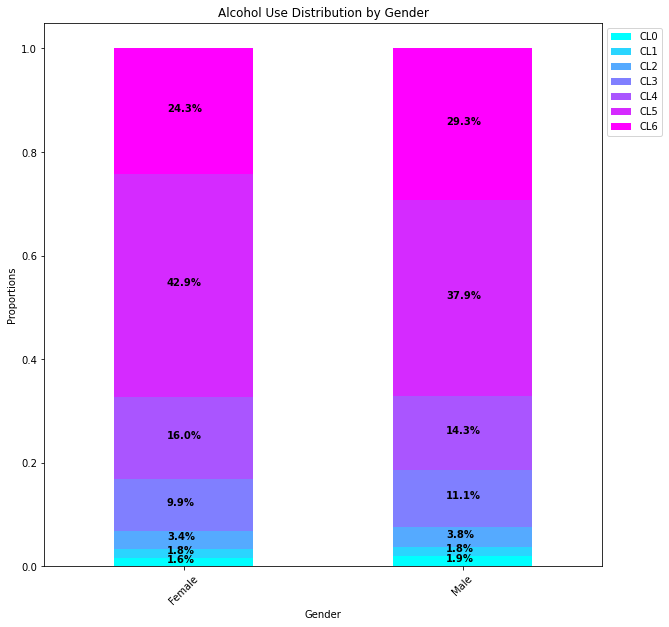

In [185]:
stacked_bar('gender', 'alcohol', 'cool', 'Gender','Alcohol Use Distribution by Gender')

Remember that we have about the same number of male and female respondents in our data. It is interesting to note that there are more male alcohol users in the last day than females, while more female users in the past week than male. While this may not mean anything, it could possibly suggest that there are more regular male alcohol consumers (possibly alcohol abusers) than female. 

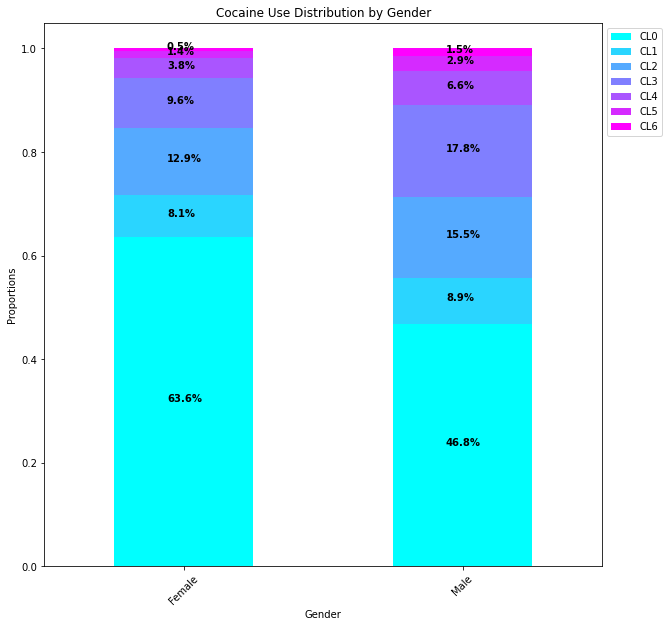

In [186]:
stacked_bar('gender', 'cocaine', 'cool', 'Gender','Cocaine Use Distribution by Gender')

It seems more men have tried (or continue to use) cocaine than women.

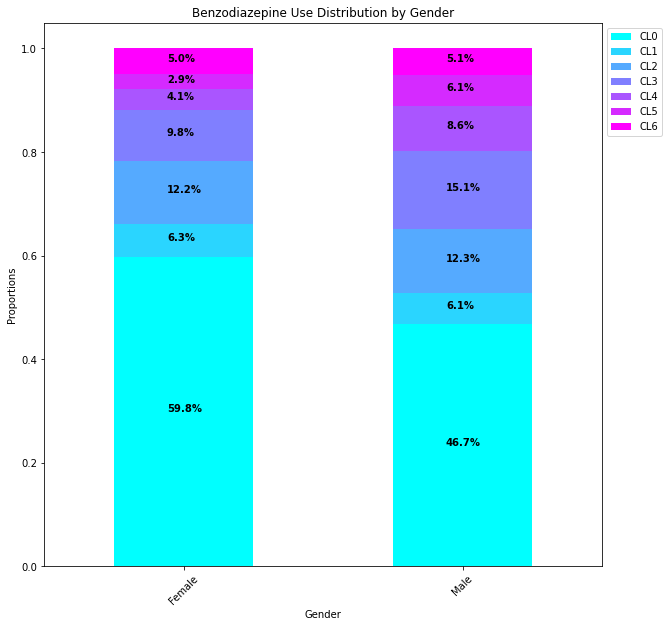

In [187]:
stacked_bar('gender', 'benzos', 'cool', 'Gender','Benzodiazepine Use Distribution by Gender')

Again, we see that for the most part, men use benzos more than females. However, once we look at those who used in the last day, it is about equal, which could possibly be due to the fact that equal numbers of men and women get prescribed such drugs to treat anxiety, insomnia, etc. 

### Drug Consumption by Age

We will now look at these three drug consumption distributions for each age group. 

In [188]:
df['age'].value_counts(normalize=True)

18-24    0.339371
25-34    0.255727
35-44    0.189132
45-54    0.156633
55+      0.059137
Name: age, dtype: float64

Since we see that the number of respondents per age group are not very similar, it will be important to look at not only the distribution of age groups per drug use response, but also the distribution of drug use per age group. 

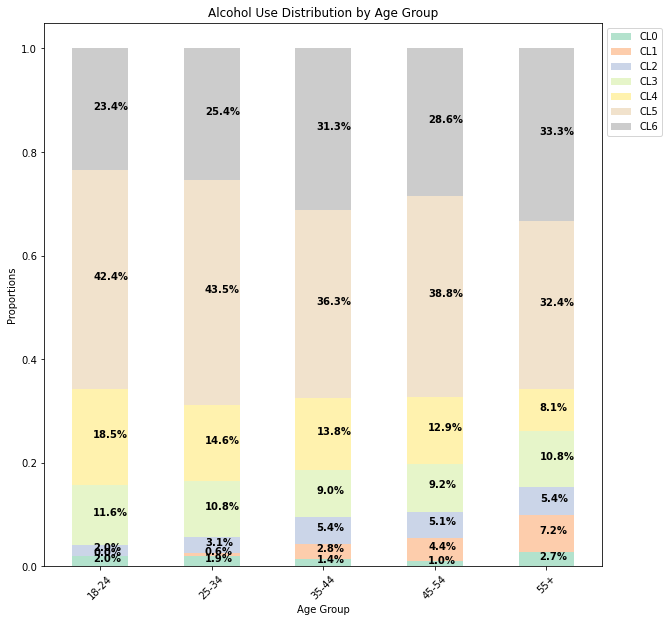

In [189]:
stacked_bar('age', 'alcohol', 'Pastel2', 'Age Group','Alcohol Use Distribution by Age Group')

We can see that the distributions of alcohol use per age group remain quite similar as age increases, until we get to the 55+ age group. 

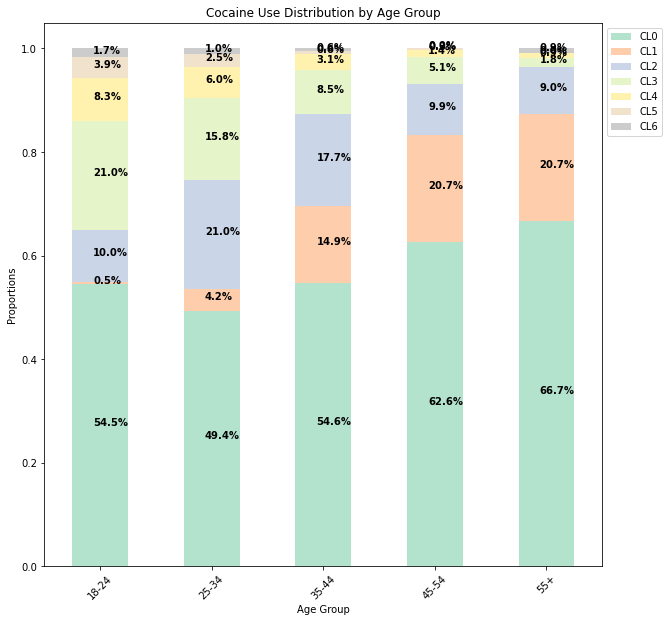

In [190]:
stacked_bar('age', 'cocaine', 'Pastel2', 'Age Group','Cocaine Use Distribution by Age Group')

We see as age increases, the 'CL1' category (representing "Used over a Decade Ago") increases, which makes sense since most users probably did this drug in their youth (18-30). Again, however, we can see that the distributions of cocaine use per age group remain quite similar as age increases.

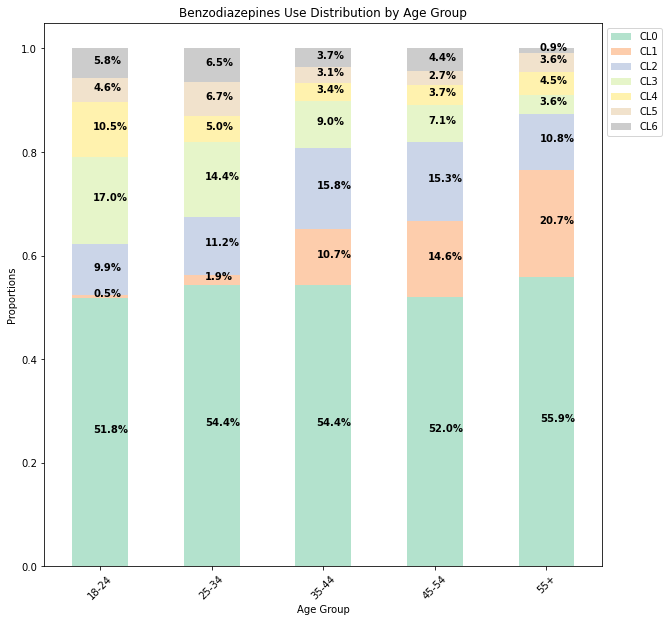

In [191]:
stacked_bar('age', 'benzos', 'Pastel2', 'Age Group','Benzodiazepines Use Distribution by Age Group')

Again, we see as age increases, the 'CL1' category (representing "Used over a Decade Ago") increases, which makes sense since most users probably did not do this drug before 18. 

### Drug Consumption by Education

In [192]:
df['education'].value_counts(normalize=True)

Attending College/No Certificate or Degree    0.267981
University Degree                             0.254662
Graduate Degree                               0.198189
Professional Certificate/Diploma              0.143847
Left School before College                    0.135322
Name: education, dtype: float64

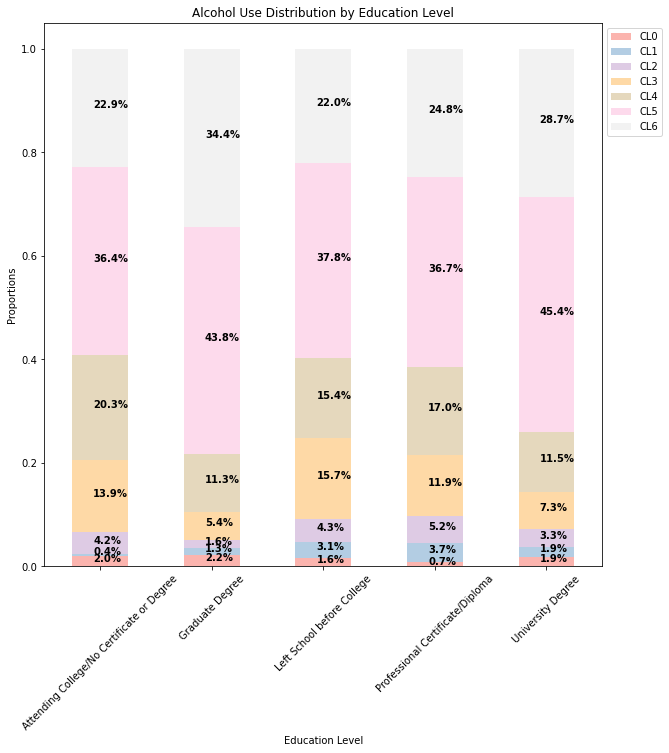

In [193]:
stacked_bar('education', 'alcohol', 'Pastel1', 'Education Level','Alcohol Use Distribution by Education Level')

We can see that those with a university degree hold the respondents who drink alcohol the most, followed by those currently attending college and those with a graduate degree. Those who left left school before college tend to drink the least. We can see the vast majority of respondents do drink alcohol and have done so in the last day, week, or month. 

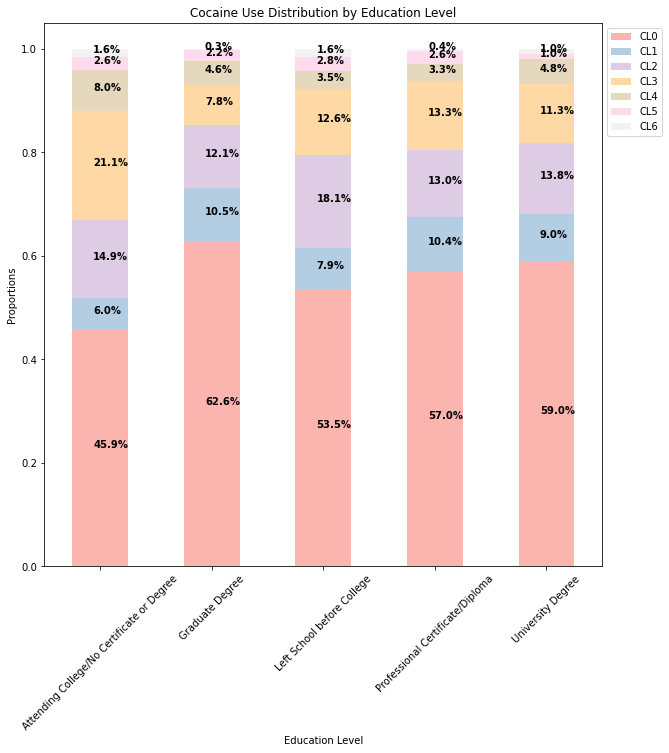

In [194]:
stacked_bar('education', 'cocaine', 'Pastel1', 'Education Level','Cocaine Use Distribution by Education Level')

We see the distributions of cocaine use per education level are quite similar. The vast majority have never used cocaine. We see those attending college hold the largest group of respondents who use or have used cocaine. 

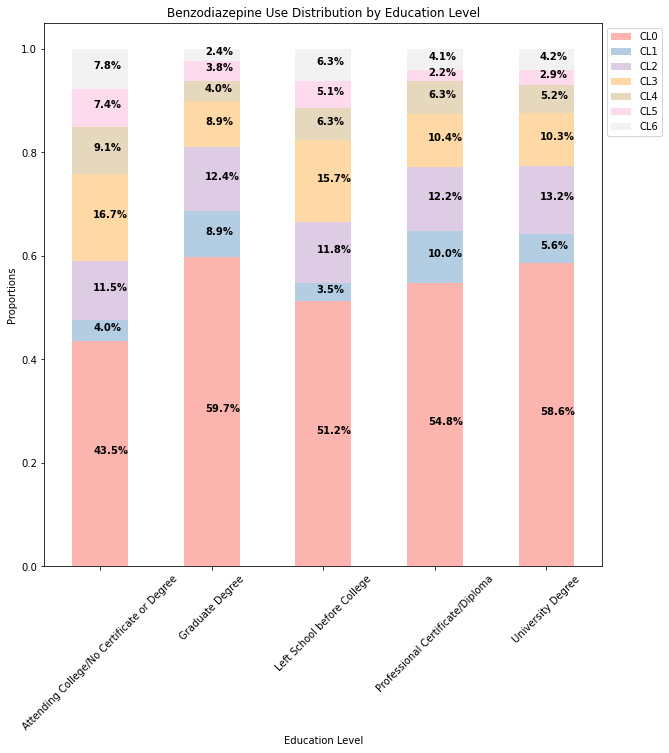

In [195]:
stacked_bar('education', 'benzos', 'Pastel1', 'Education Level','Benzodiazepine Use Distribution by Education Level')

Again, the distributions of benzo use per education level are similar, with the majority having never used the drug. We also see, again, that those attending college use the drug the most. We are seeing this similar trend, likely due to the fact that kids in college tend to explore a lot of new things as well as party a lot, which explains the higher levels of drug use. 

We also see that the levels of benzo use among university and graduate degree holders are higher than the cocaine use levels, likely due to the fact that benzos are legal prescription drugs, so some people may be prescribed these due to underlying mental/physical health issues. 

### Principle Components Analysis on Drug Consumption Variables

To further explore the drug consumption variables, it will be very interesting to perform PCA on these variables. This technique will find linear combinations of the features that are uncorrelated with one another and order them by the amount of variance they explain. To do so, we must first turn all of the drug consumption variables into numerical variables. We will then transpose the data frame so each feature respresents a different respondent and each row represents a drug consumption attribute. 

In [196]:
#First, select all of the columns we will be using, and replace all string variables with numeric values.
df_t = df.copy(deep=True)
df_t = df_t[['alcohol', 'amphet', 'amyl', 'benzos', 'caffeine', 'cannabis', 'chocolate', 'cocaine', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'vsa']]
df_t = df_t.replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,2,3,4,5,6])
                                            
df_t.head()

alcohol  amphet  amyl  benzos  caffeine  cannabis  chocolate  cocaine  \
0        5       2     0       2         6         0          5        0   
1        5       2     2       0         6         4          6        3   
2        6       0     0       0         6         3          4        0   
3        4       0     0       3         5         2          4        2   
4        4       1     1       0         6         3          6        0   

   crack  ecstasy  heroin  ketamine  legalh  lsd  meth  mushrooms  nicotine  \
0      0        0       0         0       0    0     0          0         2   
1      0        4       0         2       0    2     3          0         4   
2      0        0       0         0       0    0     0          1         0   
3      0        0       0         2       0    0     0          0         2   
4      0        1       0         0       1    0     0          2         2   

   vsa  
0    0  
1    0  
2    0  
3    0  
4    0

In [197]:
#Transpose the dataframe
df_t = df_t.transpose()
df_t.head()

0     1     2     3     4     5     6     7     8     9     ...  \
alcohol      5     5     6     4     4     2     6     5     4     6  ...   
amphet       2     2     0     0     1     0     0     0     0     1  ...   
amyl         0     2     0     0     1     0     0     0     0     0  ...   
benzos       2     0     0     3     0     0     0     0     0     1  ...   
caffeine     6     6     6     5     6     6     6     6     6     6  ...   

          1875  1876  1877  1878  1879  1880  1881  1882  1883  1884  
alcohol      5     6     6     4     4     5     5     4     5     4  
amphet       0     0     2     0     3     0     0     6     0     3  
amyl         0     0     0     0     0     0     0     5     0     0  
benzos       0     0     6     0     3     0     0     5     0     3  
caffeine     5     5     6     2     5     4     5     6     6     6  

[5 rows x 1877 columns]

In [198]:
#Let's save the attribute names in a separate array
df_t_index = df_t.index
df_t_index

Index(['alcohol', 'amphet', 'amyl', 'benzos', 'caffeine', 'cannabis',
       'chocolate', 'cocaine', 'crack', 'ecstasy', 'heroin', 'ketamine',
       'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'vsa'],
      dtype='object')

In [199]:
#Now, we can fit the PCA transformation on our transposed dataframe
drug_pca = PCA().fit(df_t)

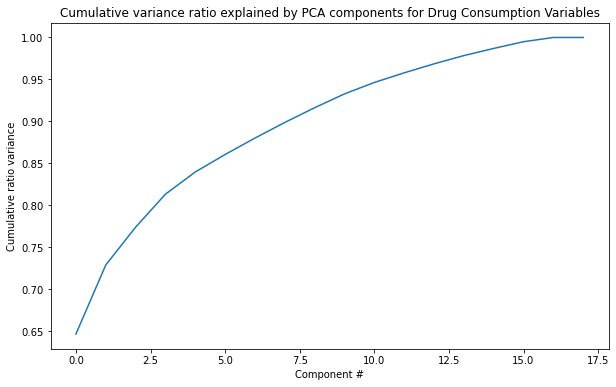

In [200]:
#Plot the cumulative variance ratio with number of components
plt.subplots(figsize=(10, 6))
plt.plot(drug_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Drug Consumption Variables');

We can see the first two components account for about 73% of the total variance. 

In [201]:
#Let's now apply the PCA transformation to our data
drug_pca_x = drug_pca.transform(df_t)

In [202]:
drug_pca_x.shape

(18, 18)

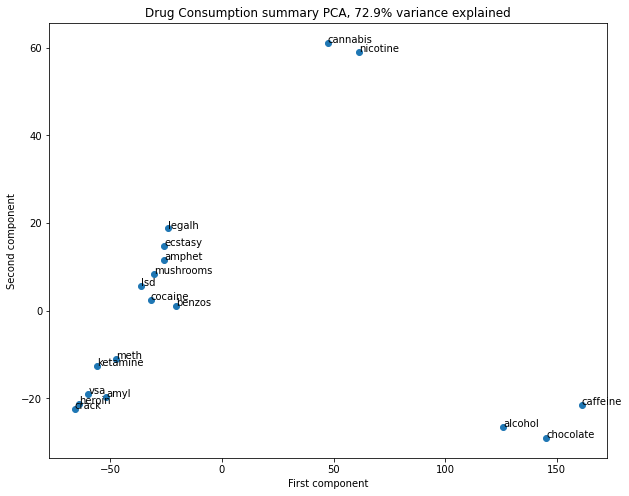

In [203]:
#Now, we plot the first two principle components from our drug_pca_x dataframe

x = drug_pca_x[:, 0]
y = drug_pca_x[:, 1]
drugs = df_t_index
pc_var = 100 * drug_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Drug Consumption summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(drugs, x, y):
    plt.annotate(s, (x, y))

This is a very interesting graph to analyze, as we see 4 distinct groupings of our drugs. The first grouping has cannabis and nicotine, both relatively mild drugs, where nicotine is completely legal and cannabis is known to be widely used. Another grouping we see is with alcohol, chocolate, and caffeine. These can be seen as the most commonly used substances, where virtually no harm is associated with moderate use of these three. Another group we see includes legal highs, ecstasy, amphetamines, magic mushrooms, LSD, cocaine, and benzodiazepines. These are all prescription drugs and 'party/designer drugs'. These are drugs that can certainly be considered detrimental to one's health, but people often times (especially in college) try once or more. The last grouping we have includes methadone, ketamine, heroin, crack, amyl nitrite, and volatile substance abuse. This grouping can be seen as the most severe and dangerous drugs that one could do, and we know these to be the least common drugs that the average person would partake in. 

### Feature Importance Using Random Forest

Let's now use a Random Forest Classifier from the scikitlearn module to help find the feature importances of our predictor variables for each of the drugs we have been looking at (alcohol, cocaine, benzodiazapines). We will first have to convert the categorical predictor variables into separate dummy variables. Again, we will not be using residing country or race as predicting variables as the data we have does not include enough diversified samples for these to be meaningful. 

In [204]:
df_dummies = df[['age', 'gender', 'education', 'n_score','e_score', 'o_score', 'a_score', 'c_score', 'i_score', 's_score']]
df_dummies = pd.get_dummies(df_dummies)
df_dummies.head()

n_score  e_score  o_score  a_score  c_score  i_score  s_score  age_18-24  \
0     39.0     36.0     42.0     37.0     42.0      4.0      3.0          0   
1     29.0     52.0     55.0     48.0     41.0      3.0      6.0          0   
2     31.0     45.0     40.0     32.0     34.0      2.0      8.0          0   
3     34.0     34.0     46.0     47.0     46.0      2.0      3.0          1   
4     43.0     28.0     43.0     41.0     50.0      4.0      6.0          0   

   age_25-34  age_35-44  age_45-54  age_55+  gender_Female  gender_Male  \
0          0          1          0        0              1            0   
1          1          0          0        0              0            1   
2          0          1          0        0              0            1   
3          0          0          0        0              1            0   
4          0          1          0        0              1            0   

   education_Attending College/No Certificate or Degree  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   education_Graduate Degree  education_Left School before College  \
0                          0                                     0   
1                          1                                     0   
2                          0                                     0   
3                          1                                     0   
4                          1                                     0   

   education_Professional Certificate/Diploma  education_University Degree  
0                                           1                            0  
1                                           0                            0  
2                                           1                            0  
3                                           0                            0  
4                                           0                            0

In [205]:
df_dummies.columns

Index(['n_score', 'e_score', 'o_score', 'a_score', 'c_score', 'i_score',
       's_score', 'age_18-24', 'age_25-34', 'age_35-44', 'age_45-54',
       'age_55+', 'gender_Female', 'gender_Male',
       'education_Attending College/No Certificate or Degree',
       'education_Graduate Degree', 'education_Left School before College',
       'education_Professional Certificate/Diploma',
       'education_University Degree'],
      dtype='object')

In [206]:
#import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Set predictor variables and target variable
X = df_dummies
y = df.alcohol

#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [207]:
#
rf_alcohol = RandomForestClassifier(n_estimators=100)
rf_alcohol.fit(X_train, y_train)

RandomForestClassifier()

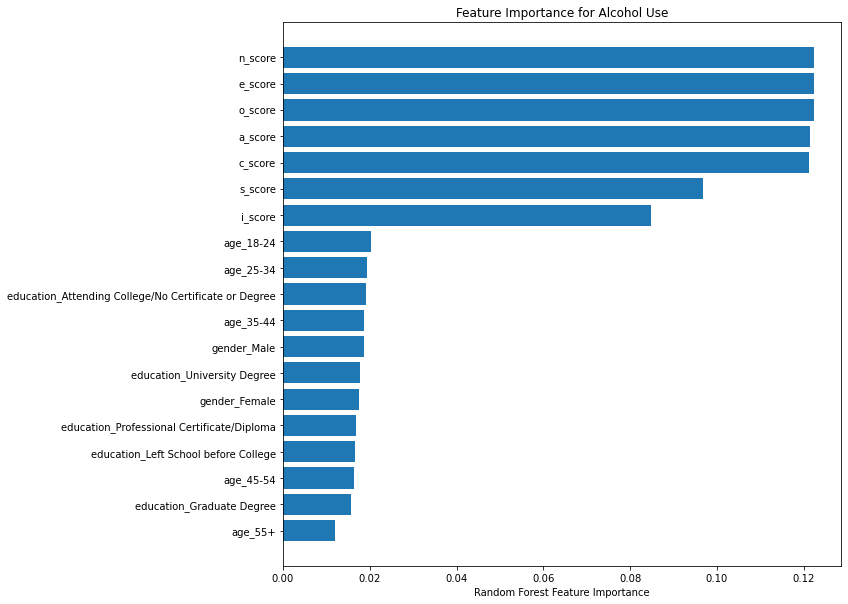

In [208]:
sorted_idx = rf_alcohol.feature_importances_.argsort()
plt.subplots(figsize=(10, 10))
plt.barh(X.columns[sorted_idx], rf_alcohol.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Alcohol Use")
plt.show()

We can see all of the personality features hold the most importance for alcohol use, with neuroticism, oppenness to experience and conscientiousness being at the top. For the categorical variables, the younger age groups hold the most importance.

In [209]:
y = df.cocaine
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_cocaine = RandomForestClassifier(n_estimators=100)
rf_cocaine.fit(X_train, y_train)

RandomForestClassifier()

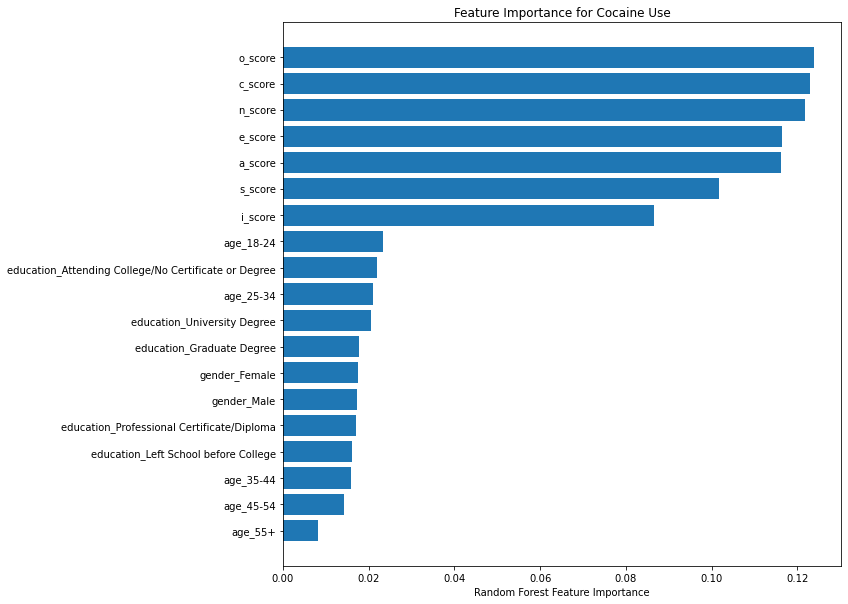

In [210]:
sorted_idx = rf_cocaine.feature_importances_.argsort()
plt.subplots(figsize=(10, 10))
plt.barh(X.columns[sorted_idx], rf_cocaine.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Cocaine Use")
plt.show()

Again, we can see all of the personality features hold the most importance for cocaine use, with neuroticism, oppenness to experience and extraversion being at the top. For the categorical variables, those attending college as well as the two youngest age groups hold the most importance.

In [211]:
y = df.benzos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_benzos = RandomForestClassifier(n_estimators=100)
rf_benzos.fit(X_train, y_train)

RandomForestClassifier()

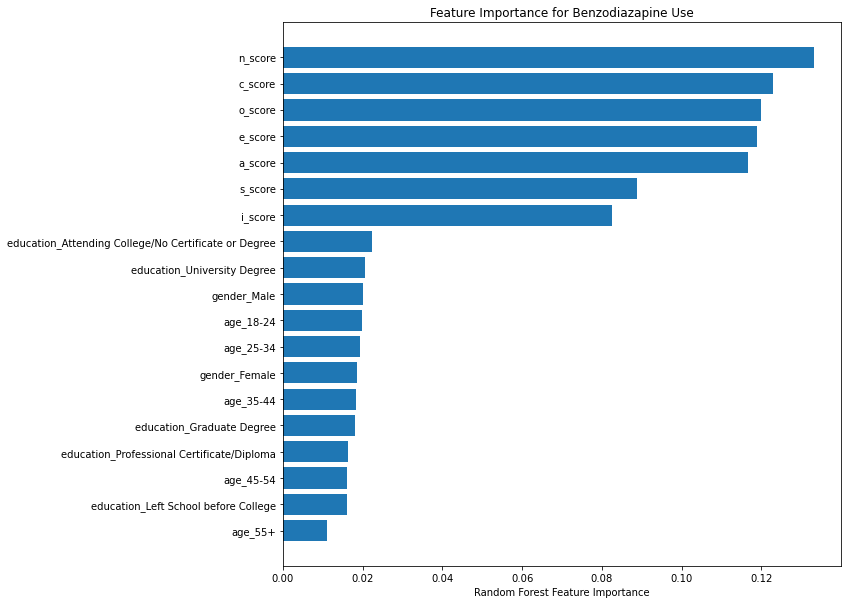

In [212]:
sorted_idx = rf_benzos.feature_importances_.argsort()
plt.subplots(figsize=(10, 10))
plt.barh(X.columns[sorted_idx], rf_benzos.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Benzodiazapine Use")
plt.show()

For benzodiazapine use, we can see once again that all of the personality features hold the most importance, with neuroticism, oppenness to experience and conscientiousness being at the top. For the categorical variables, those who are 18-24, and those who are female hold the most importance. For all of the drugs, the oldest age groups seem to hold the least importance. 

# Conclusion

We have learned quite a bit about our drug consumption dataset from this brief analysis. Firstly, from the below distributions of alcohol, cocaine, and benzodiazapines, we learned that the majority of our respondents consume alcohol quite frequently (within the last day, week, or month). Very few respondents have never tried alcohol, while the majority of the respondents have never tried cocaine or benzos. There are slightly more regular users of benzos than cocaine in our sample, likely due to the fact that benzos are legal prescription drugs while cocaine is illegal. 

Also, after some hypothesis testing, we learned that there is a statistically significant difference in s-score (or sensation-seeking) between men and women, in that men seem to have a higher score for this personality trait due to some underlying reason. We see a similar trend in our data with i-score (impulsivity), as well as the opposite trend with a-score (agreeableness) and c-score (conscientiousness). 

In regards to age, we saw the trend that neuroticism, openness to experience, impulsivity and sensation-seeking tend to go down as one’s age increases, while conscientiousness tends to go up with age. For education levels, we see some of the highest scores for openness to experience and sensation seeking among those currently attending college, which does make sense. We also see that agreeableness and conscientiousness tends to rise with increasing levels of formal education. 

Again, when looking at drug use, we found that most of our respondents consume alcohol quite regularly, particularly in the past day or week, while cocaine and benzodiazepines are a different story. We found in our dataset that slightly more men consumed alcohol in the last day than women, while slightly more woman consumed alcohol in the past week. While the total for these two categories were about the same for men and women, this may suggest that men are more likely to consume alcohol even more frequently (and even abuse alcohol more frequently) than women. We found that there were far more women who never tried cocaine or benzos than men, so more men have tried (or continue to use) these drugs than women. With benzos, however, those who used in the last day were about the same between both genders, possibly due to the fact that it is a legal, prescription drug. Those who hold a university degree tend to drink alcohol most frequently, followed by those attending college and those holding a graduate degree. Those attending college hold the largest percentage of past or present cocaine and benzo users. 

After conducting Principal Components Analysis, we found 4 major categories of drug users from 2 components explaining about 73 percent of the variance between the drug consumption variables. One for cannabis and nicotine, one for the perceived least dangerous substances and most widely accepted (alcohol, chocolate, caffeine), one for the party/college/prescription/hallucination drugs (LSD, ecstasy, cocaine, benzos, etc.), and one for the most dangerous and possibly most addicting drugs (heroin, crack, methadone, etc.). 

Lastly, after using random forest to find feature importances for the predictor variables for each of our drug categories of interest, we got some interesting findings. We see that for alcohol, neuroticism, oppenness to experience, and conscientiousness hold the most significance in regard to the personality variables, while the younger age groups also hold some significance. For cocaine use, we see neuroticism, oppenness to experience, and extraversion hold most significance, while those attending college also hold significance. For benzo use, the most significant personality variables are neuroticism, openness to experience, and conscientiousness, while those attending college as well as those who are female holds higher levels of significance as well. For all three drugs/substances, impulsivity and sensation-seeking hold the lowest significance out of the personality traits, and older age groups generally are at the bottom of significance levels as well. 